In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [37]:
# Importing Data
%store -r float_imdb
%store -r obj_imdb

In [ ]:
# This notebook is designed to test different dependent variables to uncover what the most important features are for that
# specific demograph.
# What is displayed below is a model for the males_45age_avg_vote

In [39]:
float_imdb.columns

Index(['year', 'duration', 'avg_vote', 'votes', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_avg_vote', 'males_45age_votes',
       'females_allages_avg_vote', 'females_allages_votes',
       'females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote',
       'females_18age_votes', 'females_30age_avg_vot

In [80]:
males_45_float_imdb = float_imdb[['metascore','males_45age_avg_vote']]
males_45_float_imdb.head()

,metascore,males_45age_avg_vote
0,0.0,6.4
1,0.0,6.3
2,0.0,5.2
3,0.0,7.0
4,0.0,5.8


In [40]:
obj_imdb.columns

Index(['Brahmanandam', 'Anupam Kher', 'Nassar', 'Eric Roberts', 'Prakash Raj',
       'Amitabh Bachchan', 'Gérard Depardieu', 'Mohanlal', 'Tanikella Bharani',
       'John Carradine',
       ...
       'Avala Film', 'Nordisk Film', 'Hammer Films', 'BBC Films', 'Lionsgate',
       'Kinostudiya imeni M. Gorkogo', 'Orion Pictures',
       'Bandai Visual Company', 'EuropaCorp', 'Dimension Films'],
      dtype='object', length=272)

In [81]:
males45_obj_imdb = pd.concat([males_45_float_imdb, obj_imdb], axis=1)
males45_obj_imdb.head(2)

,metascore,males_45age_avg_vote,Brahmanandam,Anupam Kher,Nassar,Eric Roberts,Prakash Raj,Amitabh Bachchan,Gérard Depardieu,Mohanlal,...,Avala Film,Nordisk Film,Hammer Films,BBC Films,Lionsgate,Kinostudiya imeni M. Gorkogo,Orion Pictures,Bandai Visual Company,EuropaCorp,Dimension Films
0,0.0,6.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,6.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
list(males45_obj_imdb.columns)

['metascore',
 'males_45age_avg_vote',
 'Brahmanandam',
 'Anupam Kher',
 'Nassar',
 'Eric Roberts',
 'Prakash Raj',
 'Amitabh Bachchan',
 'Gérard Depardieu',
 'Mohanlal',
 'Tanikella Bharani',
 'John Carradine',
 'Mammootty',
 'Paresh Rawal',
 'Christopher Lee',
 'Gulshan Grover',
 'Ali',
 'Srinivasa Rao Kota',
 'Michael Madsen',
 "Henry O'Neill",
 'Om Puri',
 'John Wayne',
 'Shakti Kapoor',
 'Akshay Kumar',
 'Johnny Lever',
 'Jagathi Sreekumar',
 'Danny Trejo',
 'Innocent',
 'Nedumudi Venu',
 'Amrish Puri',
 'Asrani',
 'Andy Lau',
 'Naseeruddin Shah',
 'Anthony Quinn',
 'Mickey Rooney',
 'Keenan Wynn',
 'Siddique',
 'Donald Sutherland',
 "Velimir 'Bata' Zivojinovic",
 'Raghu Babu',
 'Michael Caine',
 'Sukumari',
 'Donald Pleasence',
 'Lance Henriksen',
 'M.S. Narayana',
 'Kader Khan',
 'Udo Kier',
 'Richard Riehle',
 'Harvey Keitel',
 'Anthony Chau-Sang Wong',
 'Tom Sizemore',
 'Catherine Deneuve',
 'Jackie Shroff',
 'Malcolm McDowell',
 'Jackie Chan',
 'Reginald Owen',
 'Joy Badlani'

In [83]:
X_2 = males45_obj_imdb.iloc[0:1000]
X_2 = X_2.drop(['males_45age_avg_vote'], axis=1)
X_2.head(2)

,metascore,Brahmanandam,Anupam Kher,Nassar,Eric Roberts,Prakash Raj,Amitabh Bachchan,Gérard Depardieu,Mohanlal,Tanikella Bharani,...,Avala Film,Nordisk Film,Hammer Films,BBC Films,Lionsgate,Kinostudiya imeni M. Gorkogo,Orion Pictures,Bandai Visual Company,EuropaCorp,Dimension Films
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
Y_2 = males45_obj_imdb.iloc[0:1000, 1]
Y_2.head(2)

0    6.4
1    6.3
Name: males_45age_avg_vote, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.33, random_state=42)

In [86]:
model_0 = XGBClassifier()

In [87]:
model_0.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
# Make predictions on model
y_pred = model_0.predict(X_test)

In [127]:
# Compute RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Root Mean Squared Error: 0.86073


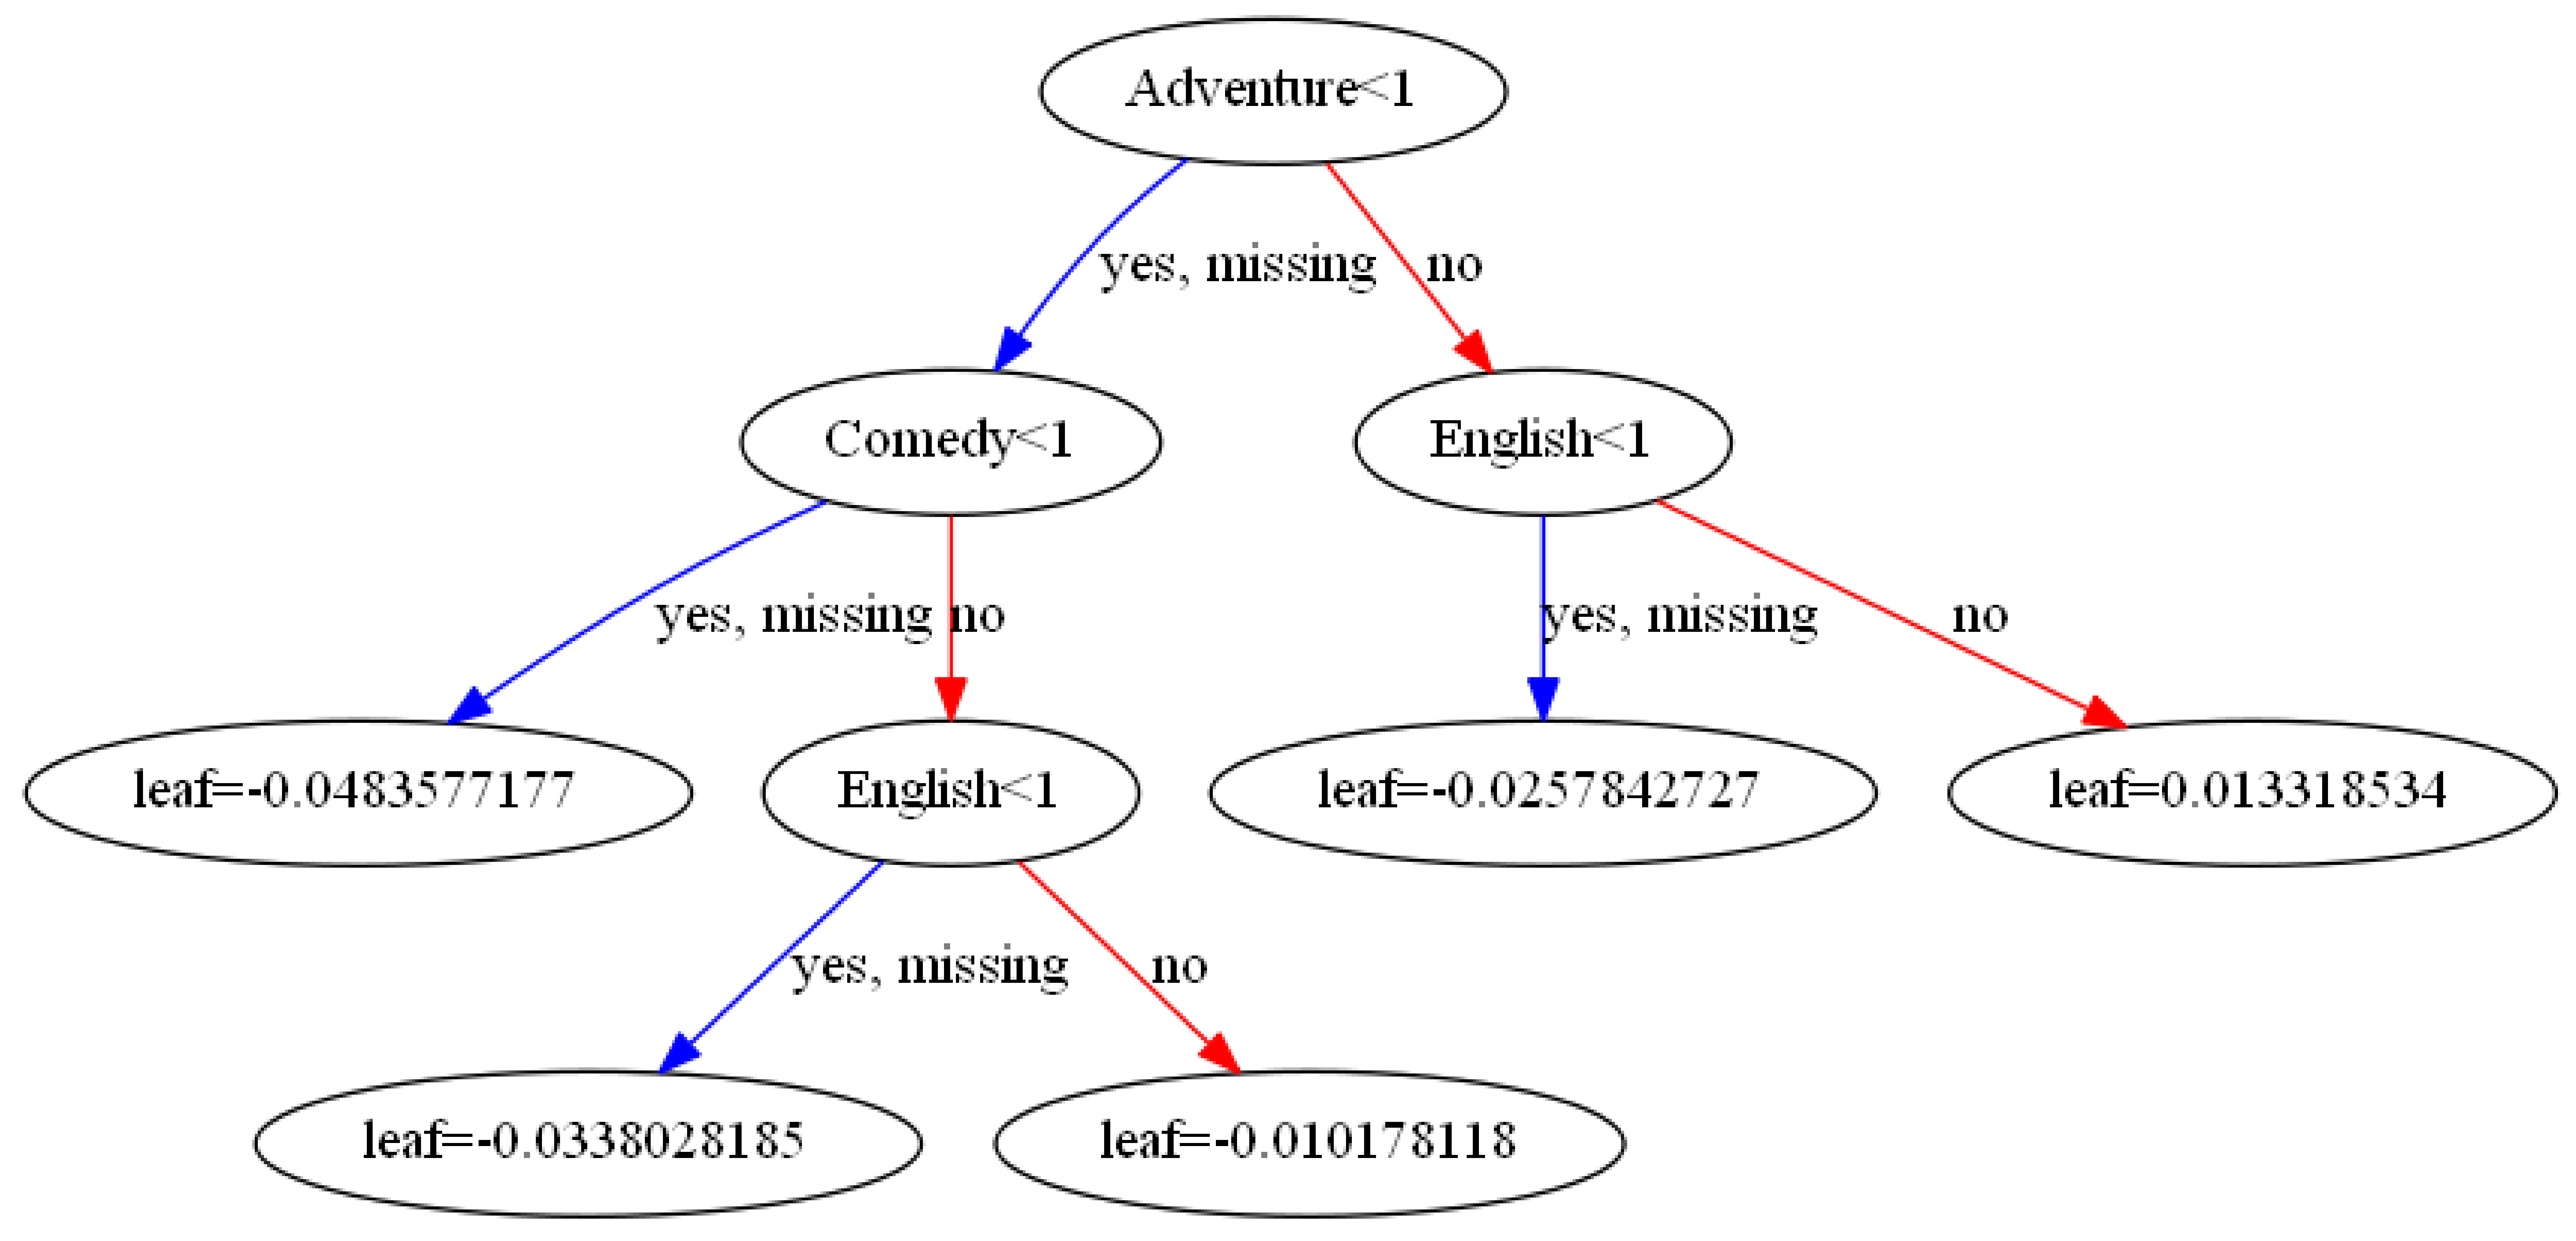

In [136]:
# Visualizing the decision tree
plot_tree(model_0, num_trees=11)
#plt.show()
fig = plt.gcf()
fig.set_size_inches(150, 100)

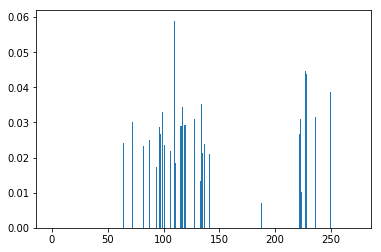

In [93]:
plt.bar(range(len(model_0.feature_importances_)), model_0.feature_importances_)
plt.show()

In [143]:
# 110 is Animation
# 121 is Germany
# 227 is Twentieth Century Fox
# 228 is Universal Pictures
# 250 is Sam Katzman Production

feature = pd.DataFrame(model_0.feature_importances_)
feature.columns=['importance']
feature.sort_values(by=['importance'], ascending=False).head(5)

,importance
110,0.058970
121,0.046523
227,0.044545
228,0.043825
250,0.038558


In [144]:
males45_obj_imdb.iloc[0:1, 110]

0    0
Name: Animation, dtype: int32